#### Basic Imports

In [159]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import os
import pyodbc

#### Database Conection Info

In [160]:
os.environ['DB_USER'] = 'sa'
os.environ['DB_PASS'] = '1234'
os.environ['DB_SERVER'] = 'PC-A'

In [161]:
def extractData(query):
    try:
        server = os.environ['DB_SERVER']
        database = 'moviesDB'
        username = os.environ['DB_USER']
        password = os.environ['DB_PASS']
        connectionString = f'DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}'

        conn = pyodbc.connect(connectionString)
        data = pd.read_sql_query(query, conn)
        conn.close()
        return data
    except Exception as error:
        data = pd.read_csv('movies.csv')
        return data

In [180]:
dfMovies = extractData('EXEC getData')
dfMovies.head()

C:\Users\50686\AppData\Local\Temp\ipykernel_17884\687809529.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql_query(query, conn)


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853104.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375040.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453536.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [163]:
def searchNullValue(columnName):
    dfTemp = dfMovies[dfMovies[columnName].isnull() == True]
    return dfTemp

def printNullCols():
    for column in dfMovies.columns.to_list():
        
        dfTemp = dfMovies[[column]].isnull()
        totalCount = int(dfTemp.count())
        nullCount = int(dfTemp[dfTemp[column] == True].count())
        nullPercent = round((nullCount/totalCount)*100, 2)
        
        if nullPercent > 0:
            print(f'-------{column}---------\n')
            print(f'Null count = {nullCount}\n')
            print(f'Null percent = {nullPercent}\n')

def getSubstring(word: str, char1, char2 = None):
    if char2 == None: 
        newString = word[word.find(f"{char1}")+1:]
    else:
        newString = word[word.find(f"{char1}")+1:word.find(f"{char2}")]
    return newString

#### Basic EDA (Exploratory Data Analisis)

In [164]:
dfMovies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [165]:
dfMovies.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [166]:
dfMovies.describe(exclude=['int64', 'float64'])

,name,rating,genre,released,director,writer,star,country,company
count,7668,7591,7668,7666,7668,7665,7667,7665,7651
unique,7512,12,19,3414,2949,4535,2814,59,2385
top,Nobody's Fool,R,Comedy,"February 14, 1986 (United States)",Woody Allen,Woody Allen,Nicolas Cage,United States,Universal Pictures
freq,3,3697,2245,9,38,37,43,5475,377


In [167]:
printNullCols()

-------rating---------

Null count = 77

Null percent = 1.0

-------released---------

Null count = 2

Null percent = 0.03

-------score---------

Null count = 3

Null percent = 0.04

-------votes---------

Null count = 3

Null percent = 0.04

-------writer---------

Null count = 3

Null percent = 0.04

-------star---------

Null count = 1

Null percent = 0.01

-------country---------

Null count = 3

Null percent = 0.04

-------budget---------

Null count = 2171

Null percent = 28.31

-------gross---------

Null count = 189

Null percent = 2.46

-------company---------

Null count = 17

Null percent = 0.22

-------runtime---------

Null count = 4

Null percent = 0.05



#### Handling Numeric Null Values

In [168]:
for column in dfMovies.select_dtypes(include= ['int64', 'float64']).columns.to_list():
    meanValue = round(dfMovies[column].mean(), 0)
    # Replacing null values for the mean value
    dfMovies.loc[
        dfMovies[column].isnull(),
        column
    ] = meanValue

In [169]:
dfMovies.select_dtypes(include= ['int64', 'float64']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     7668 non-null   int64  
 1   score    7668 non-null   float64
 2   votes    7668 non-null   float64
 3   budget   7668 non-null   float64
 4   gross    7668 non-null   float64
 5   runtime  7668 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 359.6 KB


#### Handling Categorical Null Values

In [170]:
dfMovies.select_dtypes(include=['object']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      7668 non-null   object
 1   rating    7591 non-null   object
 2   genre     7668 non-null   object
 3   released  7666 non-null   object
 4   director  7668 non-null   object
 5   writer    7665 non-null   object
 6   star      7667 non-null   object
 7   country   7665 non-null   object
 8   company   7651 non-null   object
dtypes: object(9)
memory usage: 539.3+ KB


In [171]:
## Removing released column as it will not be used
dfMovies.drop(labels=['released'], axis=1, inplace=True)

In [172]:
# Replacing null values on country column for the most frequent
mostCommonCountry = dfMovies.groupby(by='country', axis=0)[['name']].count().sort_values(by='name',ascending=False).reset_index().iloc[0]['country']
dfMovies.loc[
    dfMovies['country'].isnull(),
    'country'
] = mostCommonCountry

In [173]:
#Dropping the unique row that has a null value on the star column
dfMovies.dropna(subset=['star'], inplace=True)

In [174]:
#Replacing null values of the writer column for the unknown class
dfMovies.loc[
    dfMovies['writer'].isnull(),
    'writer'
] = 'Unknown'

In [175]:
#Replacing null values on the colum rating for the next value
dfMovies['rating'].fillna(method = 'ffill', inplace=True)

In [176]:
# Replacing null values on company column for the most frequent
mostCommonCompany = dfMovies.groupby(by='company', axis=0)[['name']].count().sort_values(by='name',ascending=False).reset_index().iloc[0]['company']
dfMovies.loc[
    dfMovies['company'].isnull(),
    'company'
] = mostCommonCompany
mostCommonCompany

'Universal Pictures'

In [177]:
dfMovies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7667 entries, 0 to 7667
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7667 non-null   object 
 1   rating    7667 non-null   object 
 2   genre     7667 non-null   object 
 3   year      7667 non-null   int64  
 4   score     7667 non-null   float64
 5   votes     7667 non-null   float64
 6   director  7667 non-null   object 
 7   writer    7667 non-null   object 
 8   star      7667 non-null   object 
 9   country   7667 non-null   object 
 10  budget    7667 non-null   float64
 11  gross     7667 non-null   float64
 12  company   7667 non-null   object 
 13  runtime   7667 non-null   float64
dtypes: float64(5), int64(1), object(8)
memory usage: 898.5+ KB


### Questions: 
### 1- What are the features that will help us to get a better score for a movie?
### 2- How can we maximize the gross revenue?

In [178]:
dfMoviesNumerized = dfMovies
for column in dfMoviesNumerized.columns.to_list():
    if dfMoviesNumerized[column].dtype == 'object':
        dfMoviesNumerized[column] = dfMoviesNumerized[column].astype('category')
        dfMoviesNumerized[column] = dfMoviesNumerized[column].cat.codes

dfMoviesNumerized

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6586,6,6,1980,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2318,146.0
1,5573,6,1,1980,5.8,65000.0,2269,1632,327,55,4500000.0,58853104.0,730,104.0
2,5142,4,0,1980,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375040.0,1539,124.0
3,286,4,4,1980,7.7,221000.0,1301,2000,2246,55,3500000.0,83453536.0,1811,88.0
4,1027,6,4,1980,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1776,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,6,6,2020,3.1,18.0,1500,2289,2421,55,7000.0,78500541.0,2280,90.0
7664,1678,6,4,2020,4.7,36.0,774,2614,1886,55,35589876.0,78500541.0,538,90.0
7665,4717,6,6,2020,5.7,29.0,2061,2683,2040,55,58750.0,78500541.0,940,107.0
7666,2843,6,6,2020,6.0,88109.0,1184,1824,450,55,15000.0,78500541.0,2280,120.0


<Axes: >

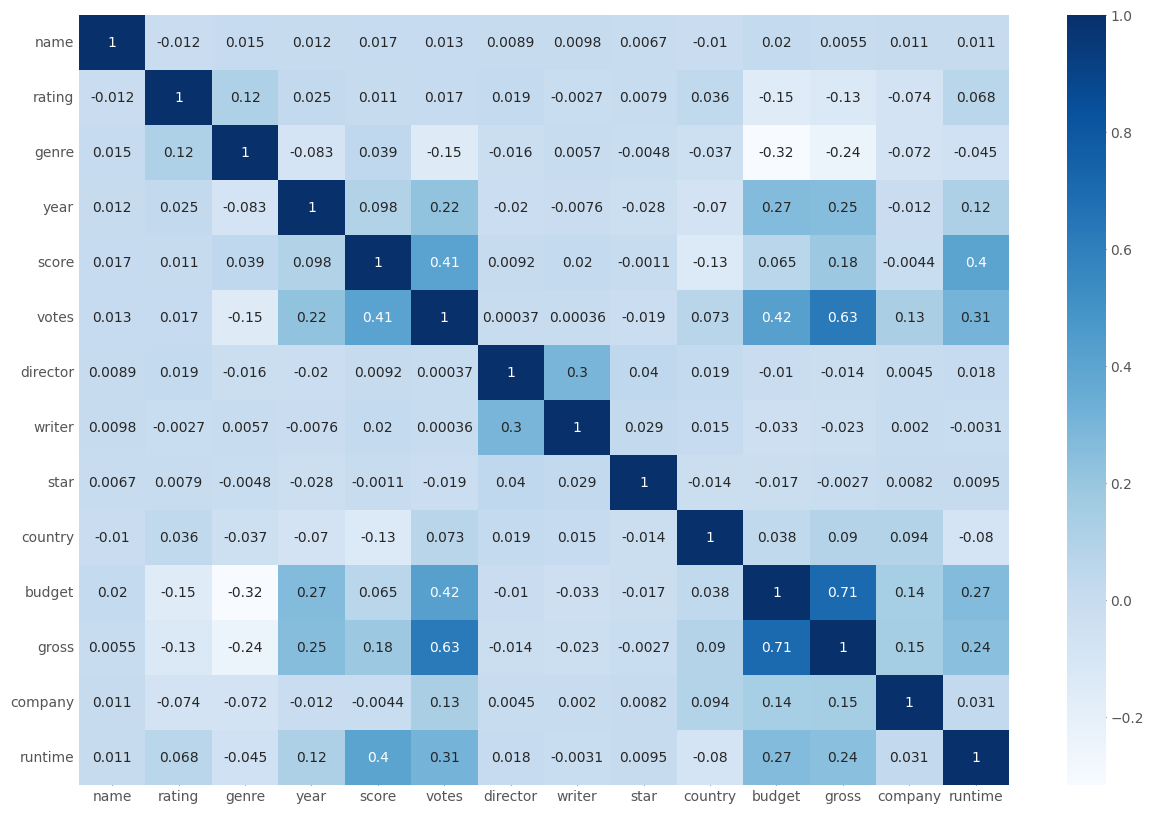

In [182]:
corrMatrix = dfMoviesNumerized.corr()

fig, ax = plt.subplots(figsize=(15, 10) )
sns.heatmap(data=corrMatrix, cmap='Blues', annot=True, ax=ax)

## Correlation Findings:

Question 1:
- Score and Votes have a high positive correlation
- Score and Runtime have a high positive corelation
- Based on the Score/Votes correlation, how can we get more votes?
    - Votes and budget have a positive correlation 
    - Votes and Company have a positive correlation
    - Votes and Runtime have a positive correlation

Text(0, 0.5, 'Votes (In Thousands)')

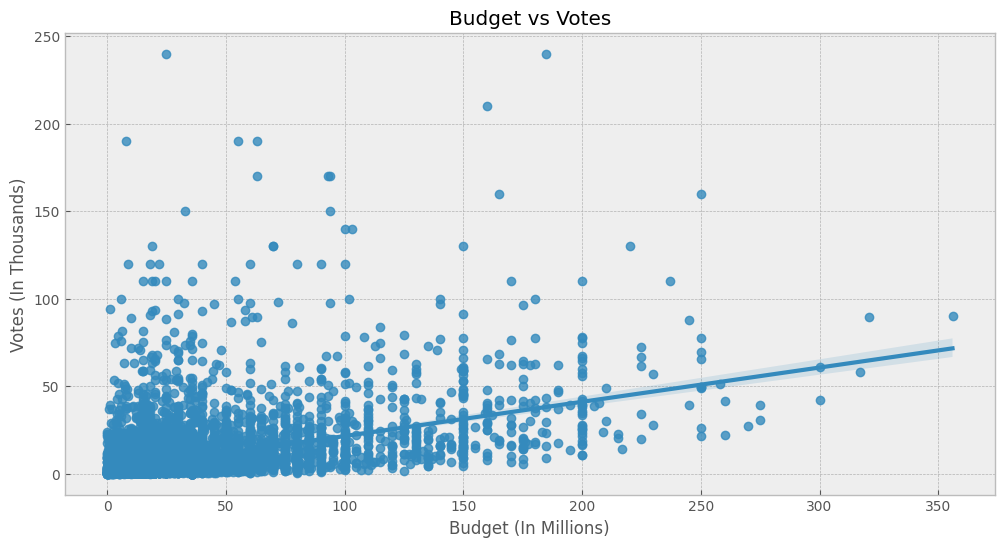

In [183]:
## Budget vs Votes
xValueMillions = dfMoviesNumerized['budget'] / 10**6
yValueK = dfMoviesNumerized['votes'] / 10**4
fig, ax = plt.subplots(figsize=(12, 6))
plt.title(f'Budget vs Votes')
sns.regplot(x=xValueMillions, y=yValueK, ax=ax)
plt.xlabel(f'Budget (In Millions)')
plt.ylabel(f'Votes (In Thousands)')

Text(0, 0.5, 'Votes (In Thousands)')

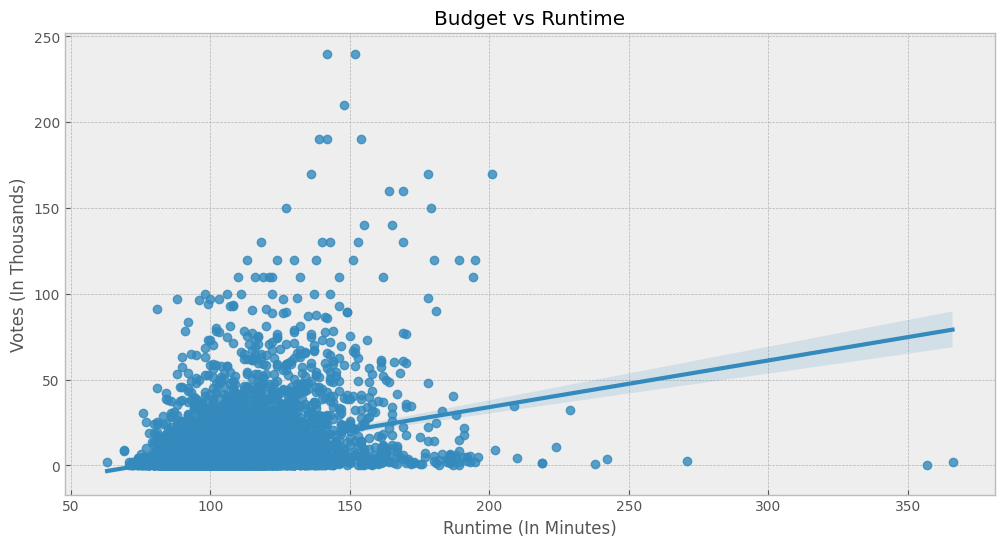

In [227]:
## Runtime vs Votes
yValueK = dfMoviesNumerized['votes'] / 10**4
fig, ax = plt.subplots(figsize=(12, 6))
plt.title(f'Budget vs Runtime')
sns.regplot(x=dfMoviesNumerized['runtime'], y=yValueK, ax=ax)
plt.xlabel(f'Runtime (In Minutes)')
plt.ylabel(f'Votes (In Thousands)')

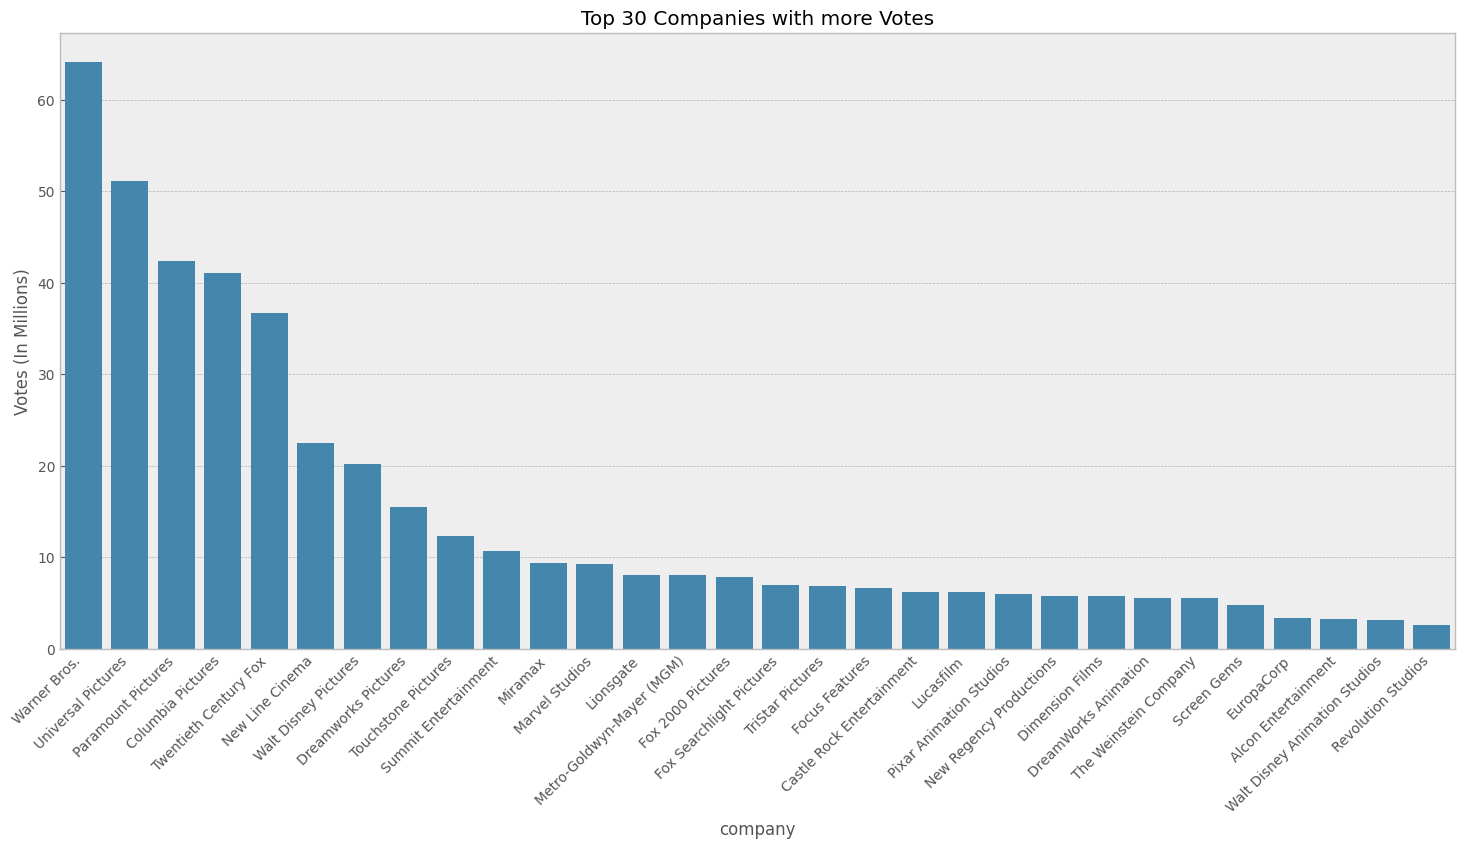

In [238]:
#Votes vs Company
top30Companies = dfMovies[['company', 'votes']].groupby('company').sum().sort_values(by='votes', ascending=False).reset_index()[:30]
top30Companies['votes'] = top30Companies['votes'] / 10**6
plt.figure(figsize=(18, 8))
sns.barplot(x='company', y='votes', data=top30Companies)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Votes (In Millions)')
plt.title('Top 30 Companies with more Votes')
plt.show()

Question 2:
- Gross and rating have a low negative correlation
- Gross and genre have a high negative correlation
- Gross and votes have a high positive correlation
- Gross and Budget have a high positive correlation 

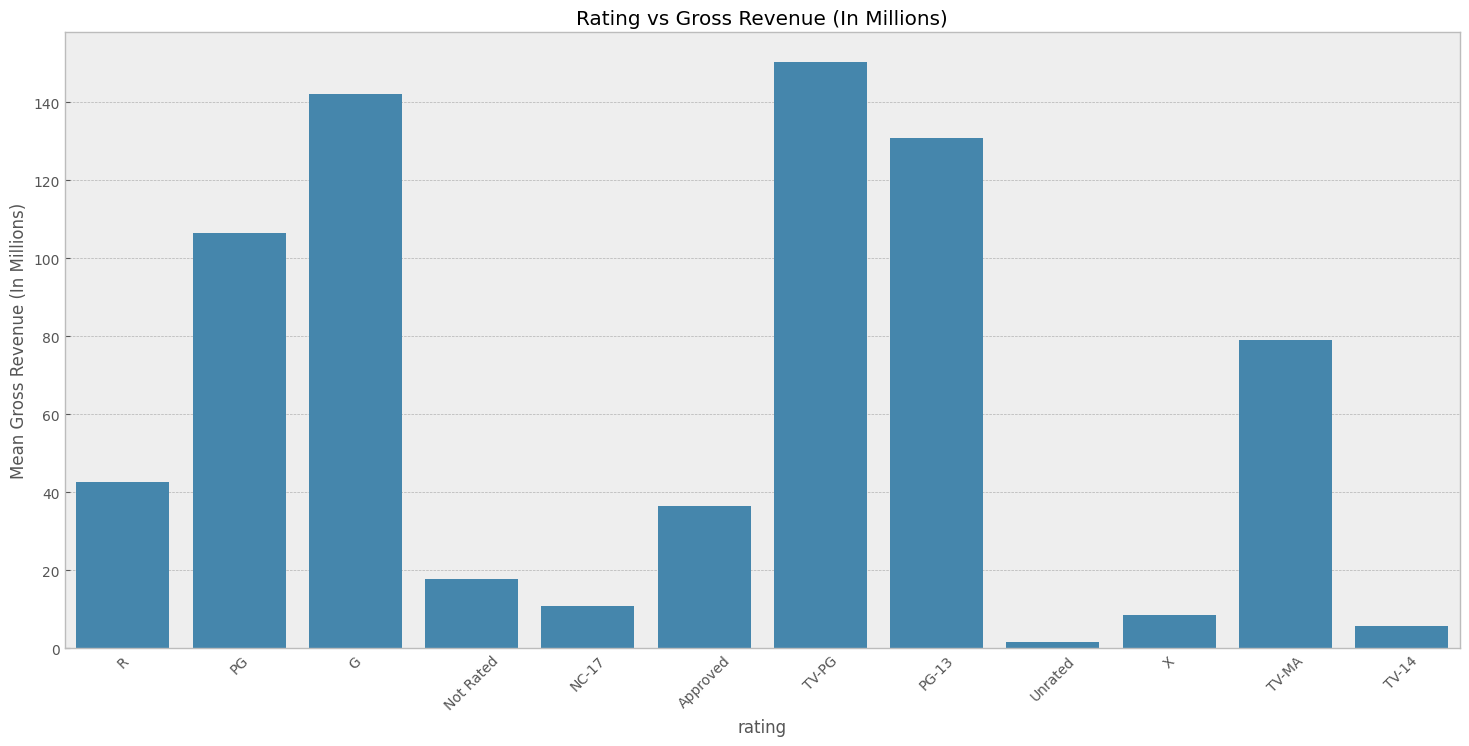

In [240]:
# Rating vs Gross
grossInMillions = dfMovies['gross'] / 10**6
plt.figure(figsize=(18, 8))
plt.xticks(rotation=45)
plt.title("Rating vs Gross Revenue (In Millions)")
plt.ylabel('Mean Gross Revenue (In Millions)')
sns.barplot(x=dfMovies['rating'], y=grossInMillions, errorbar=None)
plt.show()


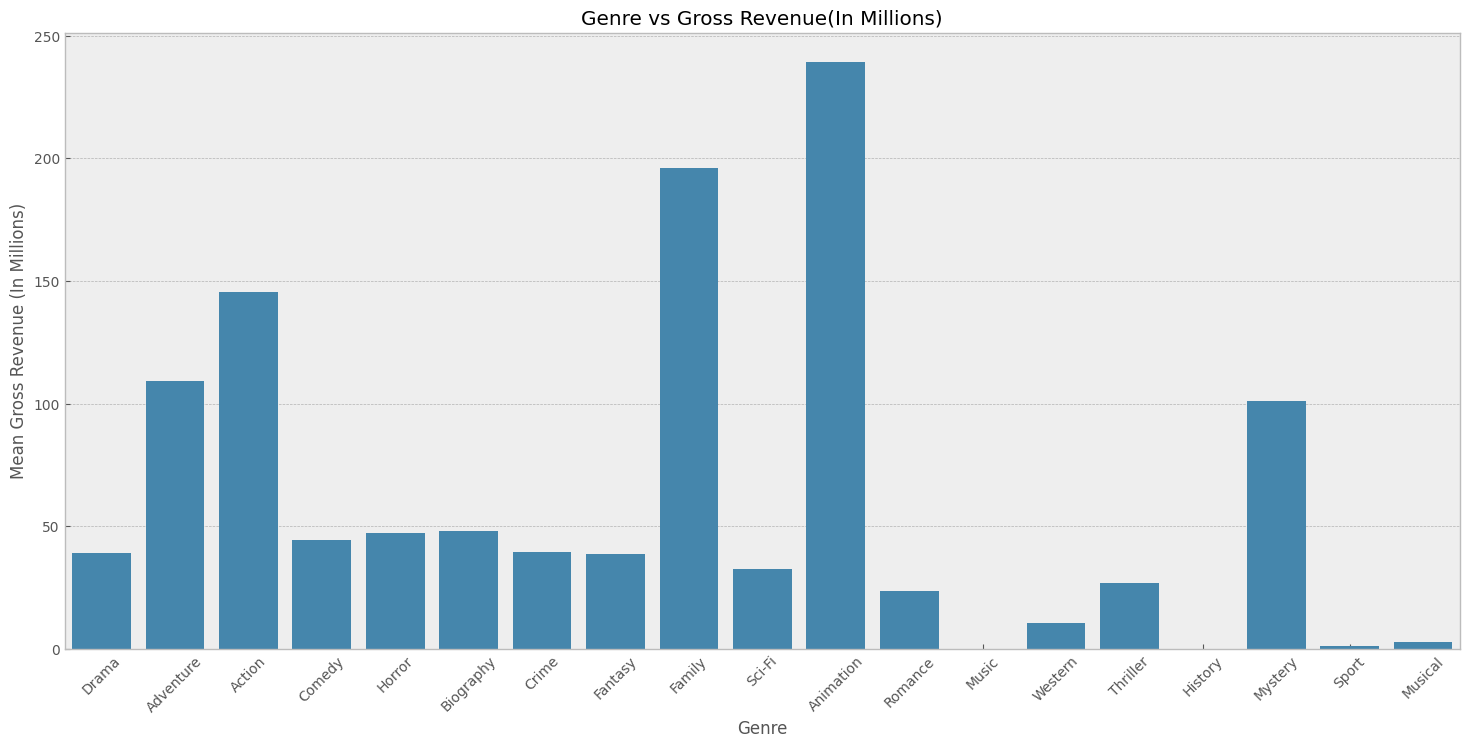

In [247]:
#Gross and genre
grossInMillions = dfMovies['gross'] / 10**6
plt.figure(figsize=(18, 8))
plt.xticks(rotation=45)
plt.title("Genre vs Gross Revenue(In Millions)")
plt.ylabel('Mean Gross Revenue (In Millions)')
plt.xlabel('Genre')
sns.barplot(x=dfMovies['genre'], y=grossInMillions, errorbar=None)
plt.show()